In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:

CNN_LSTM_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_rgb_only_input"
CNN_LSTM_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_fused_input"
CNN_LSTM_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_rgb_and_opt_input/"

i3d_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_rgb_only_input"
i3d_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_fused_input"
i3d_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_rgb_and_opt_input"

i3d_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_rgb_only_input"
i3d_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_fused_input"
i3d_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_rgb_and_opt_input"



## CNN+LSTM

In [3]:
training_losses_file = "CRNN_epoch_training_losses.npy"
training_scores_file = "CRNN_epoch_training_scores.npy"
test_score_file = "CRNN_epoch_test_score.npy"
test_loss_file = "CRNN_epoch_test_loss.npy"

Text(0.5, 0.98, 'CNN+LSTM')

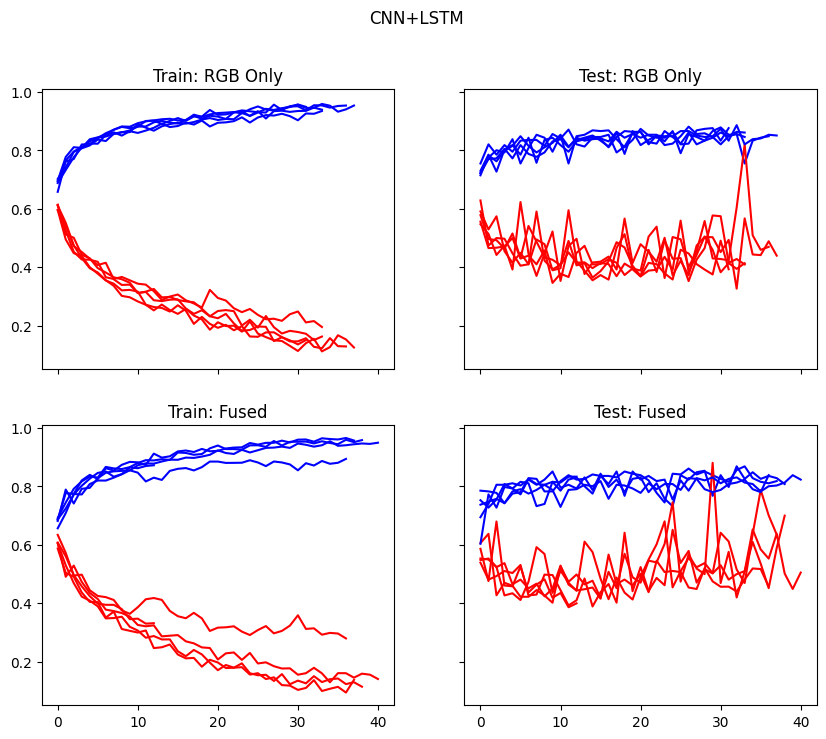

In [4]:

fig, axes =  plt.subplots(2, 2, figsize=(2*5,2*4), sharey=True, sharex=True)
for exp_run in os.listdir(CNN_LSTM_rgb_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0][0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b')
    axes[0][0].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r')

    axes[0][1].plot(exp_run_test_score, label='score', color='b')
    axes[0][1].plot(exp_run_test_loss, label='loss', color='r')
axes[0][0].set_title('Train: RGB Only')
axes[0][1].set_title('Test: RGB Only')
#
for exp_run in os.listdir(CNN_LSTM_fused_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[1][0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b')
    axes[1][0].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r')

    axes[1][1].plot(exp_run_test_score, label='score', color='b')
    axes[1][1].plot(exp_run_test_loss, label='loss', color='r')
axes[1][0].set_title('Train: Fused')
axes[1][1].set_title('Test: Fused')
fig.suptitle('CNN+LSTM')

Text(0.5, 0.98, 'CNN+LSTM')

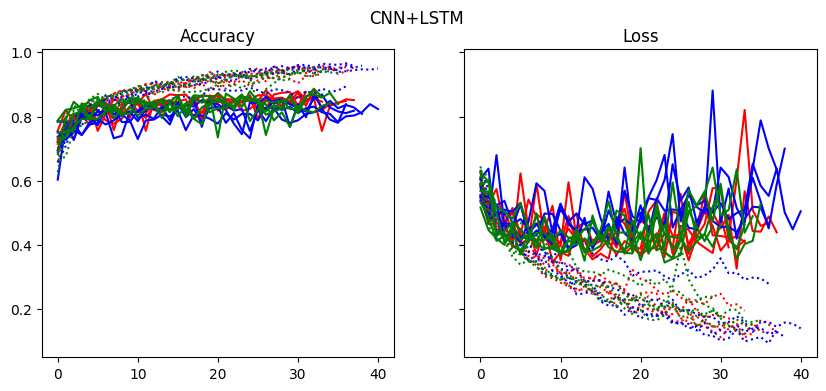

In [5]:

fig, axes =  plt.subplots(1, 2, figsize=(2*5,4), sharey=True, sharex=True)
for exp_run in os.listdir(CNN_LSTM_rgb_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(CNN_LSTM_rgb_input_results_root_dir, exp_run, test_loss_file))
    # 
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='r', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='r')
    
    # 
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='r')
    
axes[0].set_title('Accuracy')
axes[1].set_title('Loss')
#
for exp_run in os.listdir(CNN_LSTM_fused_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(CNN_LSTM_fused_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='b')
    
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='b', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='b')
#
for exp_run in os.listdir(CNN_LSTM_rgb_and_opt_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(CNN_LSTM_rgb_and_opt_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(CNN_LSTM_rgb_and_opt_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(CNN_LSTM_rgb_and_opt_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(CNN_LSTM_rgb_and_opt_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='g', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='g')
    
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='g', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='g')

fig.suptitle('CNN+LSTM')

#### Plot Average for better visualization

In [72]:

run_num, epoch_num = np.unravel_index(np.argmax(test_score_matrix, axis=None), test_score_matrix.shape)
print(run_num, epoch_num)

3 24


In [71]:
run_list = os.listdir(input_type[tmp_input_type_name])
run_list.sort()
run_list

['crnn_orig_run_0',
 'crnn_orig_run_1',
 'crnn_orig_run_2',
 'crnn_orig_run_3',
 'crnn_orig_run_4']

In [9]:
os.listdir(input_type[tmp_input_type_name])

['crnn_orig_run_1',
 'crnn_orig_run_2',
 'crnn_orig_run_4',
 'crnn_orig_run_3',
 'crnn_orig_run_0']

In [10]:
test_score


[array([0.71969697, 0.73737374, 0.76767677, 0.79292929, 0.79292929,
        0.79292929, 0.81565657, 0.83585859, 0.80050505, 0.83080808,
        0.8030303 , 0.82323232, 0.83080808, 0.81818182, 0.82323232,
        0.83333333, 0.82323232, 0.79292929, 0.77525253, 0.84343434,
        0.84848485, 0.84090909, 0.83333333, 0.86111111, 0.85858586,
        0.84090909, 0.80555556, 0.81565657, 0.82575758, 0.82575758,
        0.85606061, 0.81818182, 0.84343434, 0.87626263, 0.86363636,
        0.83838384, 0.8510101 , 0.83333333, 0.85858586, 0.84848485]),
 array([0.78787879, 0.82070707, 0.82575758, 0.83333333, 0.79545455,
        0.84848485, 0.84090909, 0.79545455, 0.82070707, 0.85858586,
        0.8459596 , 0.8459596 , 0.83333333, 0.85353535, 0.8459596 ,
        0.86616162, 0.81313131, 0.85353535, 0.84343434, 0.85353535,
        0.87121212, 0.8459596 , 0.82070707, 0.86363636, 0.84848485,
        0.85353535, 0.74242424, 0.82575758, 0.8459596 , 0.85858586,
        0.82575758, 0.86111111, 0.84090909, 0.

RGB
[45, 42, 49, 50, 45]
	Run crnn_orig_run_0, Epoch 27 gets maximum test score=0.8813131313131313
Fused
[48, 50, 50, 48]
	Run crnn_orig_run_1, Epoch 27 gets maximum test score=0.8611111111111112
RGB and OPT
[40, 41, 45, 44, 47]
	Run crnn_orig_run_3, Epoch 25 gets maximum test score=0.8787878787878788


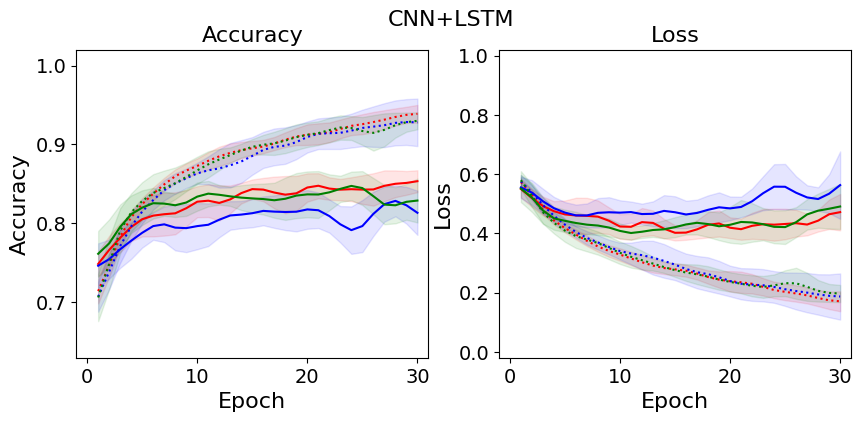

In [8]:
CNN_LSTM_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_rgb_only_input"
CNN_LSTM_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_fused_input"
CNN_LSTM_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_CNN_LSTM_rgb_and_opt_input/"

training_losses_file = "CRNN_epoch_training_losses.npy"
training_scores_file = "CRNN_epoch_training_scores.npy"
test_score_file = "CRNN_epoch_test_score.npy"
test_loss_file = "CRNN_epoch_test_loss.npy"

input_type = {'RGB': CNN_LSTM_rgb_input_results_root_dir, 
              'Fused': CNN_LSTM_fused_input_results_root_dir, 
              'RGB and OPT': CNN_LSTM_rgb_and_opt_input_results_root_dir
             }
colors = {'RGB': 'r', 'Fused': 'b', 'RGB and OPT': 'g'}
sigma = 1
smooth = True
fontsize=16
max_epoch = 30

fig, axes = plt.subplots(1,2,figsize=(10, 4))
for tmp_input_type_name in input_type:
    print(tmp_input_type_name)
    # Retrieve data
    run_name_list = []
    train_score, train_score_len = [], []
    train_loss, train_loss_len = [], []
    test_score, test_score_len = [], []
    test_loss, test_loss_len = [], []
    for exp_run in os.listdir(input_type[tmp_input_type_name]):
        exp_run_training_scores = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, training_scores_file))
        exp_run_training_losses = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, training_losses_file))
        # There is on run for fused input type having only 15 epoch, so we ignore it for better visual effect.
        if len(exp_run_training_scores) < 30:
            continue
        run_name_list.append(exp_run)
        train_score.append(exp_run_training_scores.mean(axis=1))
        train_score_len.append(len(exp_run_training_scores))
        train_loss.append(exp_run_training_losses.mean(axis=1))
        train_loss_len.append(len(exp_run_training_losses))

        exp_run_test_score = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, test_score_file))
        exp_run_test_loss = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, test_loss_file))
        test_score.append(exp_run_test_score)
        test_score_len.append(len(exp_run_test_score))
        test_loss.append(exp_run_test_loss)
        test_loss_len.append(len(exp_run_test_loss))
    print(train_score_len)
    
    
    # Average
    #  train score
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    train_score_matrix = np.zeros((len(train_score), epoch_len))
    for run_i, run_train_score in enumerate(train_score):
        train_score_matrix[run_i] = run_train_score[:epoch_len]
    
    #  train loss
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    train_loss_matrix = np.zeros((len(train_loss), epoch_len))
    for run_i, run_train_loss in enumerate(train_loss):
        train_loss_matrix[run_i] = run_train_loss[:epoch_len]

    #  test score
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    test_score_matrix = np.zeros((len(test_score), epoch_len))
    for run_i, run_test_score in enumerate(test_score):
        test_score_matrix[run_i] = run_test_score[:epoch_len]
    
    # In print, the epoch number starts from 1.
    run_num, epoch_num = np.unravel_index(np.argmax(test_score_matrix, axis=None), test_score_matrix.shape)
    print('\tRun {}, Epoch {} gets maximum test score={}'.format(run_name_list[run_num], epoch_num+1, test_score_matrix.max()))
    
    #  test loss
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    test_loss_matrix = np.zeros((len(test_loss), epoch_len))
    for run_i, run_test_loss in enumerate(test_loss):
        test_loss_matrix[run_i] = run_test_loss[:epoch_len]
    
    # plot
    avg = train_score_matrix.mean(axis=0)
    std = train_score_matrix.std(axis=0)
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[0].plot(np.arange(1, len(avg)+1), avg, label='{} Train'.format(tmp_input_type_name), linestyle=':', color=colors[tmp_input_type_name])
    axes[0].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    
    avg = test_score_matrix.mean(axis=0)[:max_epoch+1]
    std = test_score_matrix.std(axis=0)[:max_epoch+1]
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[0].plot(np.arange(1, len(avg)+1), avg, label='{} Test'.format(tmp_input_type_name), color=colors[tmp_input_type_name])
    axes[0].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    
    avg = train_loss_matrix.mean(axis=0)[:max_epoch+1]
    std = train_loss_matrix.std(axis=0)[:max_epoch+1]
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[1].plot(np.arange(1, len(avg)+1), avg, label='{} Train'.format(tmp_input_type_name), linestyle=':', color=colors[tmp_input_type_name])
    axes[1].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    
    avg = test_loss_matrix.mean(axis=0)[:max_epoch+1]
    std = test_loss_matrix.std(axis=0)[:max_epoch+1]
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[1].plot(np.arange(1, len(avg)+1), avg, label='{} Test'.format(tmp_input_type_name), color=colors[tmp_input_type_name])
    axes[1].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)

axes[0].set_ylim([0.63,1.02])
axes[1].set_ylim([-0.02,1.02])
axes[0].set_xlim([-1, max_epoch+1])
axes[1].set_xlim([-1, max_epoch+1])
axes[0].set_xticks(np.arange(0, max_epoch+1, 10))
axes[1].set_xticks(np.arange(0, max_epoch+1, 10))
axes[0].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[0].set_xlabel('Epoch', fontsize=fontsize)
axes[1].set_xlabel('Epoch', fontsize=fontsize)
axes[0].set_ylabel('Accuracy', fontsize=fontsize)
axes[1].set_ylabel('Loss', fontsize=fontsize)
axes[0].set_title('Accuracy', fontsize=fontsize)
axes[1].set_title('Loss', fontsize=fontsize)
# axes[0].legend(fontsize=fontsize)
# axes[1].legend(fontsize=fontsize)
fig.suptitle('CNN+LSTM', fontsize=fontsize)
fig.savefig('./input_type_comparison_CNN_LSTM.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

## I3D

In [40]:
training_losses_file = "3DCNN_epoch_training_losses.npy"
training_scores_file = "3DCNN_epoch_training_scores.npy"
test_score_file = "3DCNN_epoch_test_score.npy"
test_loss_file = "3DCNN_epoch_test_loss.npy"

Text(0.5, 0.98, 'I3D')

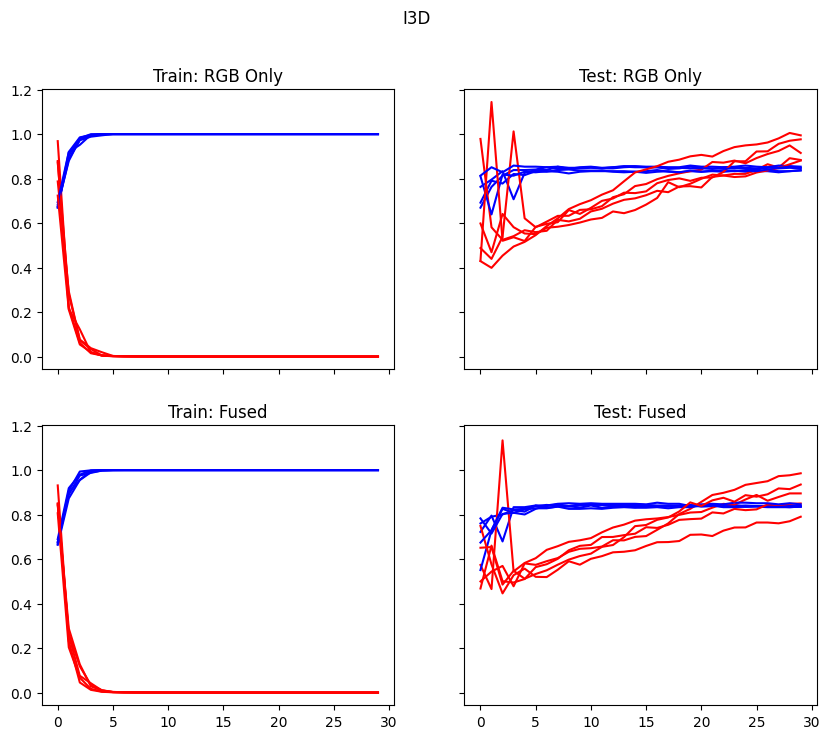

In [19]:

fig, axes =  plt.subplots(2, 2, figsize=(2*5,2*4), sharey=True, sharex=True)
for exp_run in os.listdir(i3d_rgb_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0][0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b')
    axes[0][0].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r')

    axes[0][1].plot(exp_run_test_score, label='score', color='b')
    axes[0][1].plot(exp_run_test_loss, label='loss', color='r')
axes[0][0].set_title('Train: RGB Only')
axes[0][1].set_title('Test: RGB Only')
#
for exp_run in os.listdir(i3d_fused_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[1][0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b')
    axes[1][0].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r')

    axes[1][1].plot(exp_run_test_score, label='score', color='b')
    axes[1][1].plot(exp_run_test_loss, label='loss', color='r')
axes[1][0].set_title('Train: Fused')
axes[1][1].set_title('Test: Fused')
fig.suptitle('I3D')

Text(0.5, 0.98, 'I3D')

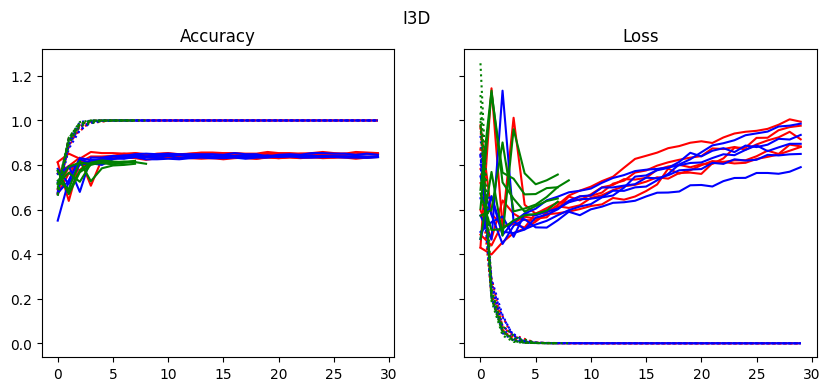

In [41]:

fig, axes =  plt.subplots(1, 2, figsize=(2*5,4), sharey=True, sharex=True)
for exp_run in os.listdir(i3d_rgb_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(i3d_rgb_input_results_root_dir, exp_run, test_loss_file))
    # 
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='r', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='r')
    
    # 
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='r', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='r')
    
axes[0].set_title('Accuracy')
axes[1].set_title('Loss')
#
for exp_run in os.listdir(i3d_fused_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(i3d_fused_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='b', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='b')
    
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='b', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='b')
#
for exp_run in os.listdir(i3d_rgb_and_opt_input_results_root_dir):
    exp_run_training_scores = np.load(os.path.join(i3d_rgb_and_opt_input_results_root_dir, exp_run, training_scores_file))
    exp_run_training_losses = np.load(os.path.join(i3d_rgb_and_opt_input_results_root_dir, exp_run, training_losses_file))
    
    exp_run_test_score = np.load(os.path.join(i3d_rgb_and_opt_input_results_root_dir, exp_run, test_score_file))
    exp_run_test_loss = np.load(os.path.join(i3d_rgb_and_opt_input_results_root_dir, exp_run, test_loss_file))
    #
    axes[0].plot(exp_run_training_scores.mean(axis=1), label='score', color='g', linestyle=':')
    axes[0].plot(exp_run_test_score, label='score', color='g')
    
    axes[1].plot(exp_run_training_losses.mean(axis=1), label='loss', color='g', linestyle=':')
    axes[1].plot(exp_run_test_loss, label='loss', color='g')

    
fig.suptitle('I3D')

#### Plot Average for better visualization

RGB
	Run i3d_run_4, Epoch 10 gets maximum test score=0.8459595959595959
Fused
	Run i3d_run_3, Epoch 13 gets maximum test score=0.851010101010101
RGB and OPT
	Run i3d_run_2, Epoch 29 gets maximum test score=0.8232323232323232


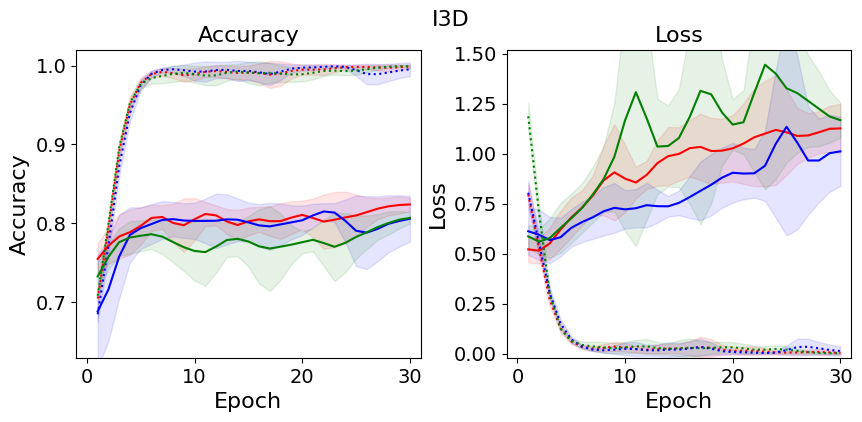

In [8]:
i3d_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_rgb_only_input"
i3d_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_fused_input"
i3d_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_rgb_and_opt_input"

i3d_rgb_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_rgb_only_input"
i3d_fused_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_fused_input"
i3d_rgb_and_opt_input_results_root_dir = r"/scratch/lingheng/cyc_safety_project_results/New_i3d_WithDropout_rgb_and_opt_input"

training_losses_file = "3DCNN_epoch_training_losses.npy"
training_scores_file = "3DCNN_epoch_training_scores.npy"
test_score_file = "3DCNN_epoch_test_score.npy"
test_loss_file = "3DCNN_epoch_test_loss.npy"

input_type = {'RGB': i3d_rgb_input_results_root_dir, 
              'Fused': i3d_fused_input_results_root_dir, 
              'RGB and OPT': i3d_rgb_and_opt_input_results_root_dir
             }
colors = {'RGB': 'r', 'Fused': 'b', 'RGB and OPT': 'g'}
sigma = 1
smooth = True
fontsize = 16
max_epoch = 30

fig, axes = plt.subplots(1,2,figsize=(10, 4))
for tmp_input_type_name in input_type:
    print(tmp_input_type_name)
    # Retrieve data
    run_name_list = []
    train_score, train_score_len = [], []
    train_loss, train_loss_len = [], []
    test_score, test_score_len = [], []
    test_loss, test_loss_len = [], []
    for exp_run in os.listdir(input_type[tmp_input_type_name]):
        exp_run_training_scores = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, training_scores_file))
        exp_run_training_losses = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, training_losses_file))
        
        run_name_list.append(exp_run)
        train_score.append(exp_run_training_scores.mean(axis=1))
        train_score_len.append(len(exp_run_training_scores))
        train_loss.append(exp_run_training_losses.mean(axis=1))
        train_loss_len.append(len(exp_run_training_losses))

        exp_run_test_score = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, test_score_file))
        exp_run_test_loss = np.load(os.path.join(input_type[tmp_input_type_name], exp_run, test_loss_file))
        test_score.append(exp_run_test_score)
        test_score_len.append(len(exp_run_test_score))
        test_loss.append(exp_run_test_loss)
        test_loss_len.append(len(exp_run_test_loss))
    # Average
    #  train score
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    train_score_matrix = np.zeros((len(train_score), epoch_len))
    for run_i, run_train_score in enumerate(train_score):
        train_score_matrix[run_i] = run_train_score[:epoch_len]

    #  train loss
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    train_loss_matrix = np.zeros((len(train_loss), epoch_len))
    for run_i, run_train_loss in enumerate(train_loss):
        train_loss_matrix[run_i] = run_train_loss[:epoch_len]

    #  test score
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    test_score_matrix = np.zeros((len(test_score), epoch_len))
    for run_i, run_test_score in enumerate(test_score):
        test_score_matrix[run_i] = run_test_score[:epoch_len]

    #  test loss
    epoch_len = np.min([np.min(test_loss_len), max_epoch])
    test_loss_matrix = np.zeros((len(test_loss), epoch_len))
    for run_i, run_test_loss in enumerate(test_loss):
        test_loss_matrix[run_i] = run_test_loss[:epoch_len]
    
    # plot
    avg = train_score_matrix.mean(axis=0)
    std = train_score_matrix.std(axis=0)
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[0].plot(np.arange(1, len(avg)+1), avg, label='{} Train'.format(tmp_input_type_name), linestyle=':', color=colors[tmp_input_type_name])
    axes[0].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    
    avg = test_score_matrix.mean(axis=0)
    std = test_score_matrix.std(axis=0)
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[0].plot(np.arange(1, len(avg)+1), avg, label='{} Test'.format(tmp_input_type_name), color=colors[tmp_input_type_name])
    axes[0].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    # In print, the epoch number starts from 1.
    run_num, epoch_num = np.unravel_index(np.argmax(test_score_matrix, axis=None), test_score_matrix.shape)
    print('\tRun {}, Epoch {} gets maximum test score={}'.format(run_name_list[run_num], epoch_num+1, test_score_matrix.max()))

    
    avg = train_loss_matrix.mean(axis=0)
    std = train_loss_matrix.std(axis=0)
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[1].plot(np.arange(1, len(avg)+1), avg, label='{} Train'.format(tmp_input_type_name), linestyle=':', color=colors[tmp_input_type_name])
    axes[1].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)
    
    avg = test_loss_matrix.mean(axis=0)
    std = test_loss_matrix.std(axis=0)
    if smooth:
        avg = gaussian_filter1d(avg, sigma)
        std = gaussian_filter1d(std, sigma)
    axes[1].plot(np.arange(1, len(avg)+1), avg, label='{} Test'.format(tmp_input_type_name), color=colors[tmp_input_type_name])
    axes[1].fill_between(np.arange(1, len(avg)+1), avg-std, avg+std, color=colors[tmp_input_type_name], alpha=0.1)

axes[0].set_ylim([0.63,1.02])
axes[1].set_ylim([-0.02,1.52])
axes[0].set_xlim([-1, max_epoch+1])
axes[1].set_xlim([-1, max_epoch+1])
axes[0].set_xticks(np.arange(0, max_epoch+1, 10))
axes[1].set_xticks(np.arange(0, max_epoch+1, 10))
axes[0].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[0].set_xlabel('Epoch', fontsize=fontsize)
axes[1].set_xlabel('Epoch', fontsize=fontsize)
axes[0].set_ylabel('Accuracy', fontsize=fontsize)
axes[1].set_ylabel('Loss', fontsize=fontsize)
axes[0].set_title('Accuracy', fontsize=fontsize)
axes[1].set_title('Loss', fontsize=fontsize)
# axes[0].legend(fontsize=fontsize-4)
# axes[1].legend(fontsize=fontsize-4)
fig.suptitle('I3D', fontsize=fontsize)
fig.subplots_adjust(wspace=0.25)
fig.savefig('./input_type_comparison_I3D.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

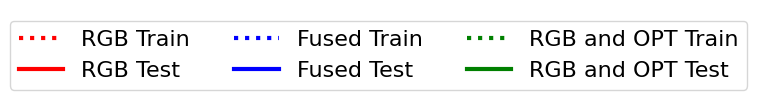

In [163]:
fig, ax = plt.subplots(1,1, figsize=(4,1.2))
colors = {'RGB': 'r', 'Fused': 'b', 'RGB and OPT': 'g'}
linestyle = {'Train': ':', 'Test': '-'}
for c in colors:
    for l in linestyle:
        ax.plot(np.arange(0), np.arange(0), color=colors[c], label='{} {}'.format(c, l), linestyle=linestyle[l], linewidth=3)
ax.legend(ncols=3, fontsize=fontsize)
ax.set_axis_off()
fig.savefig('./input_type_comparison_legend.jpg', dpi=400, bbox_inches='tight', pad_inches=0)